In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("cgu_emendas_parlamentares_tidy.csv")

df.head(3)

,ano_emenda,codigo_emenda,numero_emenda,tipo_emenda,nome_autor_emenda,localidade_gasto,id_municipio_gasto,sigla_uf_gasto,nome_funcao,nome_subfuncao,valor_empenhado,pago_integralmente
0,2015,201512550013,0013,Emenda Individual - Transferências,FATIMA BEZERRA,RIO GRANDE DO NORTE (UF),NaN,RN,Saúde,Múltiplo,848670.0,1
1,2015,201517990005,0005,Emenda Individual - Transferências,BETO MANSUR,SÃO PAULO (UF),NaN,SP,Saúde,Múltiplo,459020.0,1
2,2015,201519680007,0007,Emenda Individual - Transferências,GIACOBO,PARANÁ (UF),NaN,PR,Saúde,Múltiplo,1905120.1,0


Vamos começar coletando algumas informações básicas sobre nosso conjunto de dados. Para determinar o que podemos fazer com eles, precisamos saber quais informações temos disponíveis e seu formato.

# Informações básicas sobre o conjunto de dados

Para saber as colunas incluídas, e o tipo de variável vamos usar o método `info()`. Isso nos retornará além de uma listagem das colunas, o número de linhas preenchidas e o tipo de variável em cada uma delas.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66102 entries, 0 to 66101
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ano_emenda          66102 non-null  int64  
 1   codigo_emenda       66102 non-null  object 
 2   numero_emenda       66102 non-null  object 
 3   tipo_emenda         66102 non-null  object 
 4   nome_autor_emenda   66102 non-null  object 
 5   localidade_gasto    66102 non-null  object 
 6   id_municipio_gasto  17241 non-null  float64
 7   sigla_uf_gasto      60327 non-null  object 
 8   nome_funcao         66102 non-null  object 
 9   nome_subfuncao      66102 non-null  object 
 10  valor_empenhado     66102 non-null  float64
 11  pago_integralmente  66102 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 6.1+ MB


Temos um conjunto de informações interessante que nos permitem caminhos diferentes para explorar e analisar os dados. Podemos tomar um caminho mais geral, analisando informações sobre todo o conjunto de dados. Poderíamos também tomar uma abordagem mais específica, analisando informações sobre uma área de gastos (`nome_funcao`), ou uma Unidade Federativa específica.

Além disso, podemos analisar aspectos diferentes, como o Número de propostas, o valor total previsto ou apenas o valor das propostas pagas em sua integralidade.

A melhor ideia ao nos depararmos com um conjunto de dados desconhecido é entender o comportamento das colunas que desejamos utilizar. Por exemplo, podemos começar verificando a distribuição de variáveis categoricas usando um `countplot` ou a distribuição de variáveis numéricas usando um `histplot`.

Uma outra forma de visualizar contagem de valores é usando o método `value_counts()`. Ele nos retorna a contagem de valores únicos em uma coluna específica, semelhante ao que aconteceria se criássemos um countplot.

Vamos observar as diferentes funções governamentais que podem receber valores através de emendas parlamentares.

In [25]:
df["nome_funcao"].value_counts()

nome_funcao
Saúde                    27636
Educação                  6004
Urbanismo                 5866
Encargos especiais        3831
Agricultura               3181
Desporto e lazer          3169
Assistência social        2873
Defesa nacional           2457
Direitos da cidadania     2284
Segurança pública         1851
Cultura                   1846
Comércio e serviços       1670
Ciência e Tecnologia       647
Gestão ambiental           622
Organização agrária        604
Transporte                 383
Múltiplo                   346
Trabalho                   308
Comunicações               121
Indústria                  109
Saneamento                  82
Administração               78
Relações exteriores         62
Habitação                   44
Previdência social          20
Energia                      6
Essencial à justiça          2
Name: count, dtype: int64

Poderíamos também criar um `countplot` para visualizar a informação, mas como temos muitas categorias diferentes, a visualização pode não ficar muito boa. Se não vamos apresentar essa informação para outras pessoas, o método `value_counts()` é suficiente para nossa exploração inicial.

Vamos fazer uso do `countplot` para ver o total de emendas registradas em cada ano. Vejamos:

<Axes: xlabel='ano_emenda', ylabel='count'>

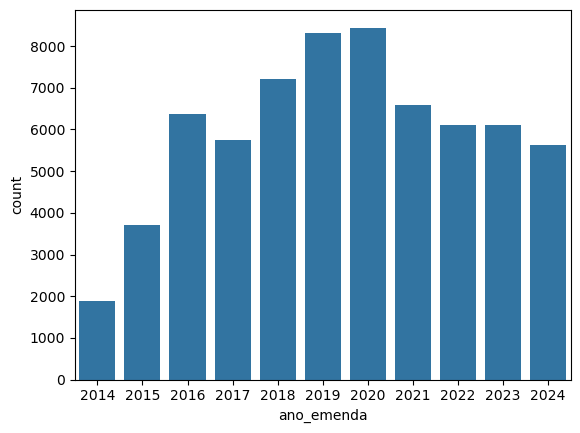

In [26]:
sns.countplot(
    x="ano_emenda",
    # y="valor_empenhado",
    data=df,
    # estimator="count",
)

Uma forma interessante de ver os mesmos dados seria utilizando o gráfico de linha. Não temos nenhuma forma direta de fazer isso com a função `lineplot`. Mas podemos facilmente desviar desse problema usando `estimator="sum"`. Para isso, precisamos apenas de uma coluna que tenha valor 1 para todas as linhas. Assim sua soma será o valor total de emendas registradas em cada ano.

<Axes: xlabel='ano_emenda', ylabel='um'>

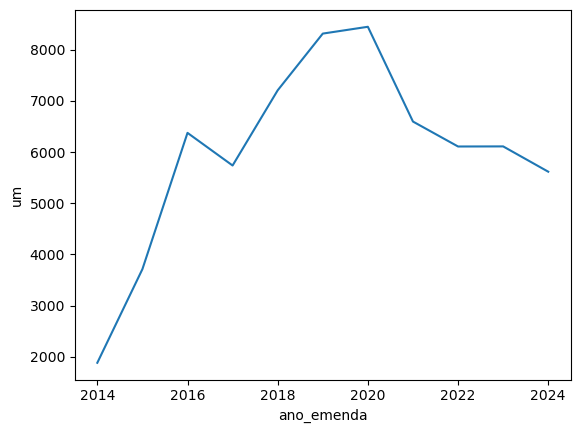

In [27]:
# criando uma nova coluna
df["um"] = 1 

sns.lineplot(
    x="ano_emenda",
    y="um",
    data=df,
    estimator="sum",
    errorbar=None,
)

Agora vamos adicionar um texto explicando o que encontramos no gráfico. Um achado interessante claro é que houve um enorme aumento no número de emendas registradas a partir de 2016. Vamos escrever isso como texto dentro do gráfico.

Vamos também aproveitar para colocar marcadores em cada ano observado.

Text(2016, 4000, 'A partir de 2016 observamos um novo patamar no número de emendas parlamentares criadas por ano.')

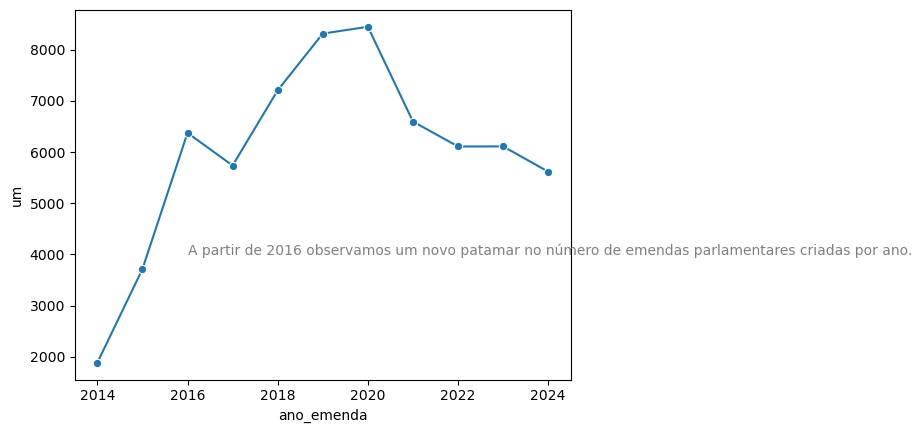

In [28]:
sns.lineplot(
    x="ano_emenda",
    y="um",
    data=df,
    marker="o",
    estimator="sum",
    errorbar=None,
)

plt.text(
    x=2016,
    y=4000,
    s="A partir de 2016 observamos um novo patamar no número de emendas parlamentares criadas por ano.",
    color="gray",
)

Precisamos fazer um único ajuste para que o texto fique mais legível. Vamos substituir um espaço por uma quebra de linha, para isso devemos usar a string `"\n"`, que representa quebra de linha dentro de textos.

Text(2016, 4000, 'A partir de 2016 observamos um novo patamar no\nnúmero de emendas parlamentares criadas por ano.')

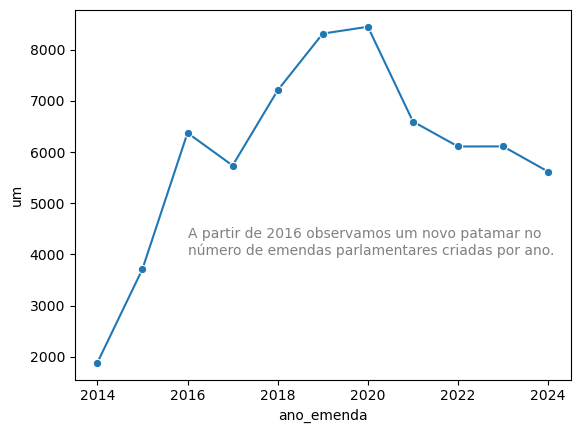

In [29]:
sns.lineplot(
    x="ano_emenda",
    y="um",
    data=df,
    marker="o",
    estimator="sum",
    errorbar=None,
)

plt.text(
    x=2016,
    y=4000,
    s="A partir de 2016 observamos um novo patamar no\nnúmero de emendas parlamentares criadas por ano.",
    color="gray",
)

Poderíamos fazer mais alguns ajustes para que o gráfico fique mais apresentável para outras pessoas. Em especial, nesse caso ajustar os rótulos dos eixos parece especialmente importante. Vamos fazer esses últimos ajustes.


Text(0.5, 1.0, 'Número de emendas parlamentares registradas por ano')

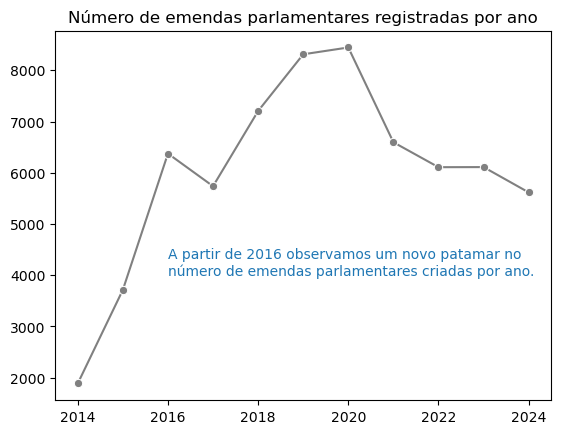

In [30]:
fig, ax = plt.subplots()

sns.lineplot(
    x="ano_emenda",
    y="um",
    data=df,
    marker="o",
    estimator="sum",
    errorbar=None,
    color="gray",
    ax=ax
)

plt.text(
    x=2016,
    y=4000,
    s="A partir de 2016 observamos um novo patamar no\nnúmero de emendas parlamentares criadas por ano.",
    color="tab:blue",
    # ax=ax
)

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Número de emendas parlamentares registradas por ano")

Agora, vamos criar um gráfico para entender a coluna `pago_integralmente`:

<Axes: xlabel='pago_integralmente', ylabel='count'>

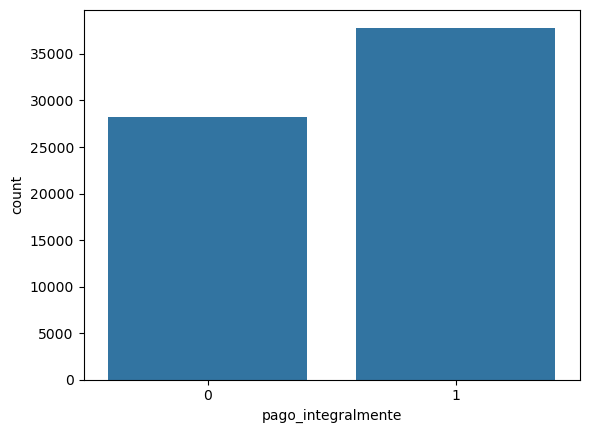

In [31]:
sns.countplot(
    x="pago_integralmente",
    data=df,
)

Essa é a primeira vez que nos deparramos com uma coluna desse tipo no curso. Costumamos chamar esse tipo de coluna com valor binários de variáveis *dummies*. Elas são muito comuns em análise de dados, e são usadas para representar variáveis categóricas que possuem apenas dois valores possíveis (podemos usar múltiplas colunas para representar variáveis categóricas com mais de dois valores possíveis, mas não abordaremos isso agora).

Geralmente a coluna vai indicar a presença (1) ou ausência (0) de uma característica. Nesse caso, a coluna `pago_integralmente` indica se a emenda foi paga integralmente pelo governo (1) ou não (0). Além de ser uma forma simples de representar informações, também traz muitas vantagens para modelar e explorar uma variável.

Vamos criar um gráfico para entender como podemos fazer uso desse tipo de informação presente na coluna `pago_integralmente`:

<Axes: xlabel='pago_integralmente', ylabel='tipo_emenda'>

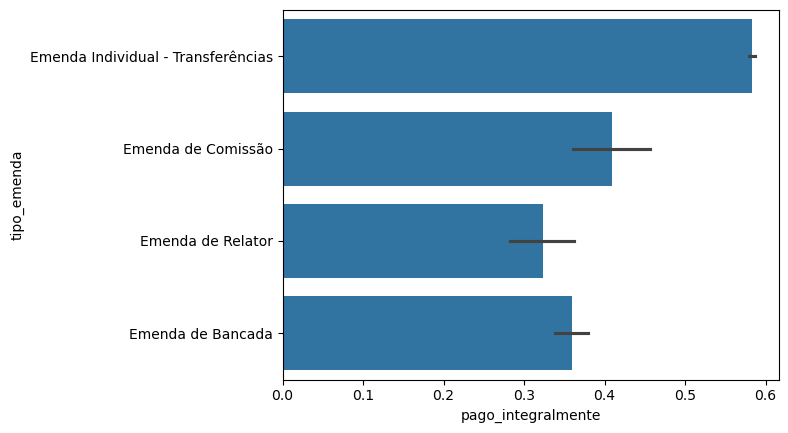

In [32]:
sns.barplot(
    y="tipo_emenda",
    x="pago_integralmente",
    data=df,
)

Antes de determinamos o significado exato desse gráfico, devemos nos lembrar que por padrão o seborn usa o argumento `estimator="mean"`. Ou seja, cada barra contém a média da coluna `pago_integralmente` para cada categoria de `tipo_emenda`. Mas o que isso significa?

Imagine que jogamos uma moeda para cima 5 vezes, anotando seu valor como 1 para resultados de cara e 0 de coroa. Armazenamos os valores de duas rodadas em listas e ao final temos o seguinte resultado:

```python
resultados_1 = [1, 0, 1, 1, 0]

resiçtados_2 = [1, 0, 0, 0, 0]
```

Se calcularmos a média desses valores, teremos: $(1 + 0 + 1 + 1 + 0) / 5 = 0.6$ para o primeiro experimento e $1 / 5 = 0.2$ para o segundo. Antes de continuar a leitura, tente responder o que cada um desses valores nos diz sobre o resultado total do experimento.

Vamos observar também o que acontece se calcularmos a soma de cada lista:

Para a primeira sequência, a soma é $(1 + 0 + 1 + 1 + 0) = 3$ e para a segunda é $1$. O que esses valores nos dizem sobre o resultado total do experimento? 

Nos utilizamos a mesma ideia para contar o número de observações por ano, mas agora temos também valores 0: a soma desses valores nos dá o número total de vezes que a moeda **caiu cara**. Ou seja, quando somamos todos os valores de uma variável binária (*dummy*) obtemos o número total de vezes que a variável/evento foi observada. No gráfico de linhas, apenas criamos uma variável que acontecia em todos os casos.

Já a média nos dá a proporção de vezes que a característica foi observada naquele grupo, ou seja, o percentual de vezes representado em decimal.

Retornando ao gráfico anterior, podemos observar que no geral emendas individuais tendem a ser pagas integralmente com mais frequência do que as demais. Cerca de 58% desse tipo de emendas foram pagas na integralidade, contra cerca de 35% das emendas de bancada, por exemplo.

Vamos ajustar o gráfico para deixar essas informações clara para o leitor.

Text(0.5, 0, 'Proporção do total de emendas')

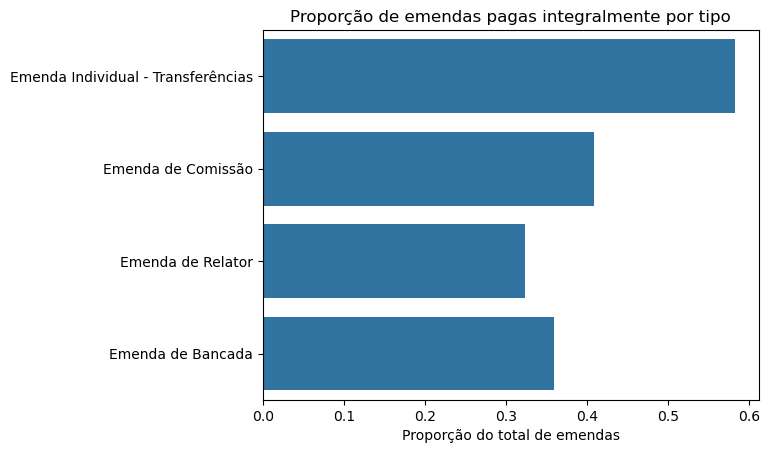

In [33]:
fig, ax = plt.subplots()

sns.barplot(
    y="tipo_emenda",
    x="pago_integralmente",
    data=df,
    errorbar=None,
    estimator="mean", # apenas para deixar claro!
    ax=ax,
)

ax.set_title("Proporção de emendas pagas integralmente por tipo")
ax.set_ylabel("")
ax.set_xlabel("Proporção do total de emendas")

Vamos fazer 2 alterações adicionais nesse gráfico:

1. Vamos alterar o texto do eixo X para ser exibido em porcentagem.
2. Vamos adicionar o valor exato de cada barra no gráfico.

Para resolver esses pontos, precisamos usar algumas linhas de códigos novas. Para mudar a formatação dos valores de decimal para porcentagem, vamos usar o método `set_major_formatter` do eixo X. Para isso, precisamos também importar outra parte do `matplotlib` com a seguinte linha de código:

```python
import matplotlib.ticker as mtick
```

Queremos mudar algo no eixo x, aqui também precisamos ter usado a função `plt.subplots()` para criar os objetos `fig` e `ax`. Se você não fez isso, o código não funcionará.

Para formator os números como porcentagem adicionaremos:

```python
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
```

Vamos primeiro fazer o import necessário e em outra célula adicionar a formatação ao eixo X alterando o código anterior..

In [34]:
import matplotlib.ticker as mtick

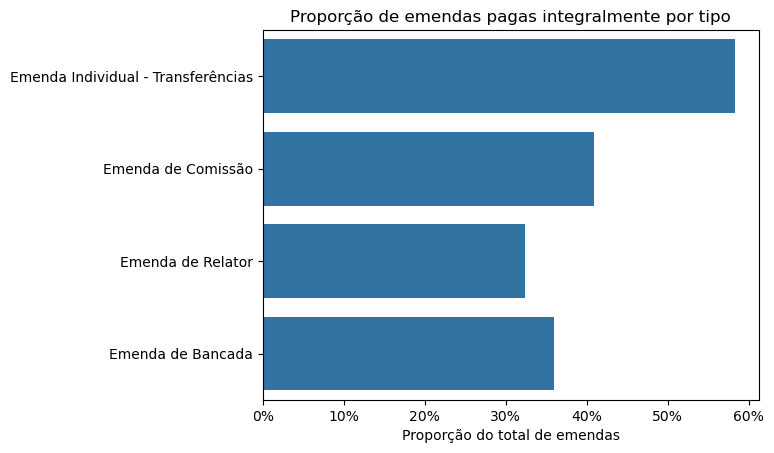

In [35]:
fig, ax = plt.subplots()

sns.barplot(
    y="tipo_emenda",
    x="pago_integralmente",
    data=df,
    errorbar=None,
    estimator="mean", # apenas para deixar claro!
    ax=ax,
)

ax.set_title("Proporção de emendas pagas integralmente por tipo")
ax.set_ylabel("")
ax.set_xlabel("Proporção do total de emendas")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

Usamos dois argumentos no método `PercentFormatter`. O primeiro é `xmax=1`, que indica que o valor máximo na representação, qual o equivalente a 100% na representação que estamos utilizando. Usamos 1 porque a representação anterior era em decimal, sendo 0 equivalente a 0% e 1 a 100%.

O segundo argumento é `decimals=0`, que indica quantas casas decimais queremos manter na representação.

Vamos agora adicionar o valor exato de cada barra no gráfico. Uma opção seria adicionar vários textos manualmente, ajustando sua posição. Contudo, isso seria extremamente trabalhoso. Poderíamos automatizar em parte essa tarefa já que estaríamos repetindo o processo em cada barra, mas ainda assim teríamos um trabalho considerável de ajustes de posição e algum código para escrever.

Uma forma mais simples de fazer é usando a método `ax.bar_label()`. Esse método adiciona os valores exatos de cada barra no gráfico. Novamente, precisamos já ter criado o objeto `ax` com a função `plt.subplots()`.

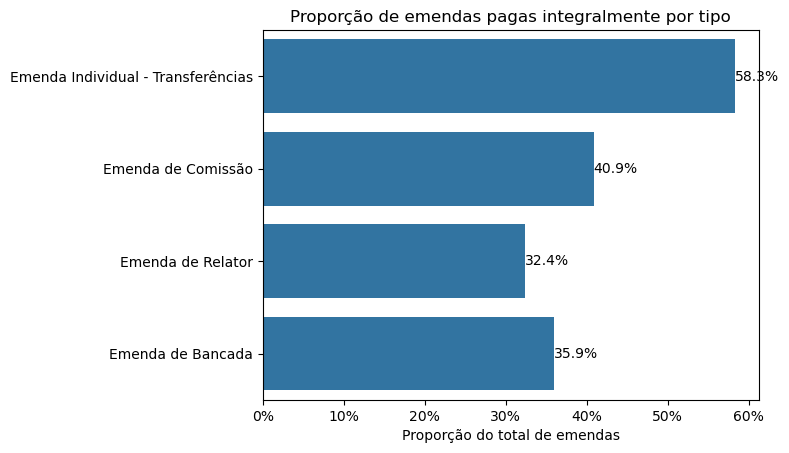

In [36]:
fig, ax = plt.subplots()

sns.barplot(
    y="tipo_emenda",
    x="pago_integralmente",
    data=df,
    errorbar=None,
    estimator="mean", # apenas para deixar claro!
    ax=ax,
)

ax.set_title("Proporção de emendas pagas integralmente por tipo")
ax.set_ylabel("")
ax.set_xlabel("Proporção do total de emendas")

ax.bar_label(ax.containers[0], fmt="{:.1%}")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))



Novamente, precisamos fazer ajustes para que o gráfico fique mais apresentável com o texto.

Podemos seguir 2 caminhos aqui:

1. Manter o texto no mesmo lugar e ajustar o tamanho e bordas do gráfico.
2. Ajustar a posição do texto para que ele fique mais visível, por exemplo, colocando-os dentro das barras.

Vamos resolver das duas formas. Primeiro, vamos remover as bordas do gráfico para que ela não corte um dos valores, com isso o gráfico também ficará um pouco mais limpo.

Para isso, vamos usar a função `sns.despine()` que remove as bordas do gráfico. Vamos adicionar essa função ao final do código que cria o gráfico. Temos um argumento que devemos usar a linha `ax=ax` e uma para cada lado que devemos indicar se queremos ou não remover.

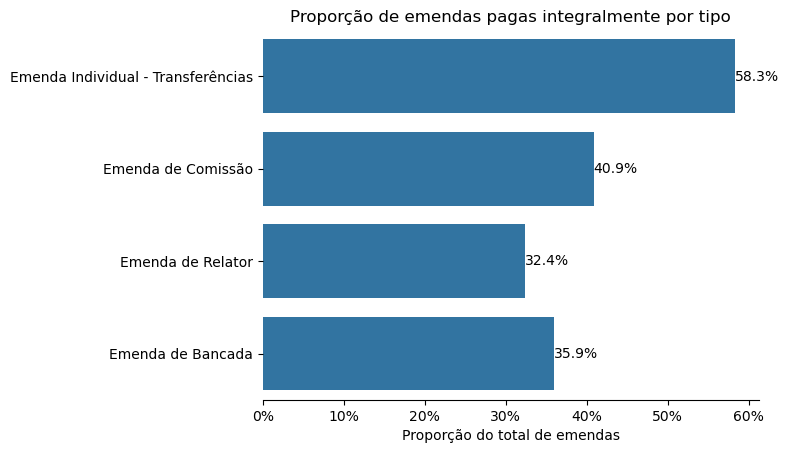

In [37]:
fig, ax = plt.subplots()

sns.barplot(
    y="tipo_emenda",
    x="pago_integralmente",
    data=df,
    errorbar=None,
    estimator="mean", # apenas para deixar claro!
    ax=ax,
)

ax.set_title("Proporção de emendas pagas integralmente por tipo")
ax.set_ylabel("")
ax.set_xlabel("Proporção do total de emendas")

ax.bar_label(ax.containers[0], fmt="{:.1%}")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

sns.despine(
    ax=ax,
    top=True,
    right=True,
    left=True,
    bottom=False,
)

Agora vamos fazer o ajuste de nosso segundo caminho. Nesse caso, devemos apenas adicionar um argumentos ao método `ax.bar_label()`: `label_type="center"`. Esse argumento indica que queremos que o texto seja colocado no centro da barra, e não na posição `"edge"` que é o padrão.

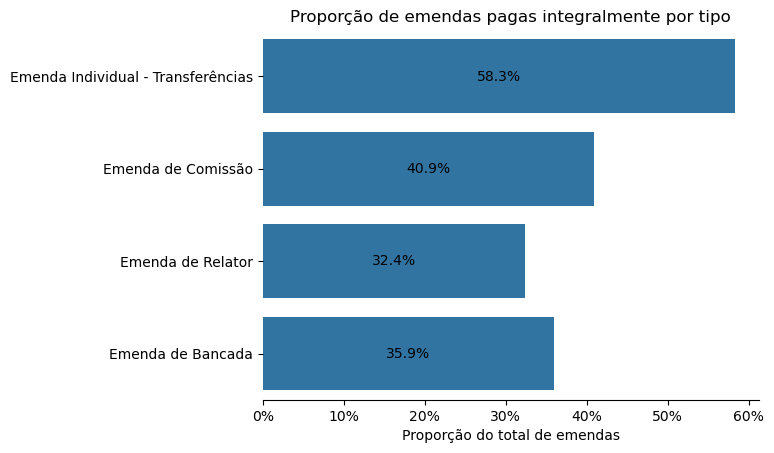

In [38]:
fig, ax = plt.subplots()

sns.barplot(
    y="tipo_emenda",
    x="pago_integralmente",
    data=df,
    errorbar=None,
    estimator="mean", # apenas para deixar claro!
    ax=ax,
)

ax.set_title("Proporção de emendas pagas integralmente por tipo")
ax.set_ylabel("")
ax.set_xlabel("Proporção do total de emendas")

ax.bar_label(ax.containers[0], fmt="{:.1%}", label_type="center")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

sns.despine(
    ax=ax,
    top=True,
    right=True,
    left=True,
    bottom=False,
)

Nesse caso podemos usar o texto na cor branca:

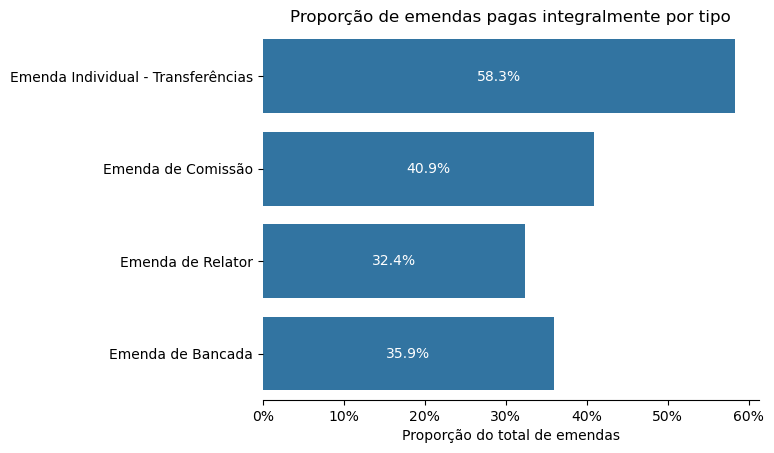

In [39]:
fig, ax = plt.subplots()

sns.barplot(
    y="tipo_emenda",
    x="pago_integralmente",
    data=df,
    errorbar=None,
    estimator="mean", # apenas para deixar claro!
    ax=ax,
)

ax.set_title("Proporção de emendas pagas integralmente por tipo")
ax.set_ylabel("")
ax.set_xlabel("Proporção do total de emendas")

ax.bar_label(ax.containers[0], fmt="{:.1%}", label_type="center", color="white")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

sns.despine(
    ax=ax,
    top=True,
    right=True,
    left=True,
    bottom=False,
)

Já estamos realizando alterações sofisticadas em nosso gráfico. Antes de continuar explorando os dados, é importante fazermos uma pausa para indicar como poderíamos encontrar informações sobre como fazer cada alteração, afinal é impossível cobrirmos todos os ajustes possívelmente utéis em nosso curso.

Uma forma importante quando queremos mudar algum aspecto de um gráfico é procurar a documentação da função. Sempre indicamos a documentação das funções do Seaborn ao longo das aulas. Contudo, isso nem sempre é suficiente, como acabamos de ver.

É importante aprender a fazer buscas para encontrar soluções de problemas, afinal, se estamos tentando fazer é muito provável que outras pessoas tenham lidado com a mesma tarefa. Essa é uma das grandes vantagens do `python`: sua grande comunidade de usuários. Nesse caso, uma busca pelo problmea "How to add bar values seaborn" facilmente encontraríamos a resposta do fórum Stack Overflow (uma fonte muito útil): https://stackoverflow.com/a/68322925

Associamos isso a documentação da função indicada do matplotlib: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html . Se você olhar com calma verá que facilmente será capaz de resolver vários casos semelhantes adicionando os valores da barra.